In [1]:
# Загрузите данные и выведите информацию о них.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/kroschenko/BelHard_DS/main/datasets/heart.csv"
df = pd.read_csv(url)
print(df.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [2]:
# Проверьте на наличие пропусков
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

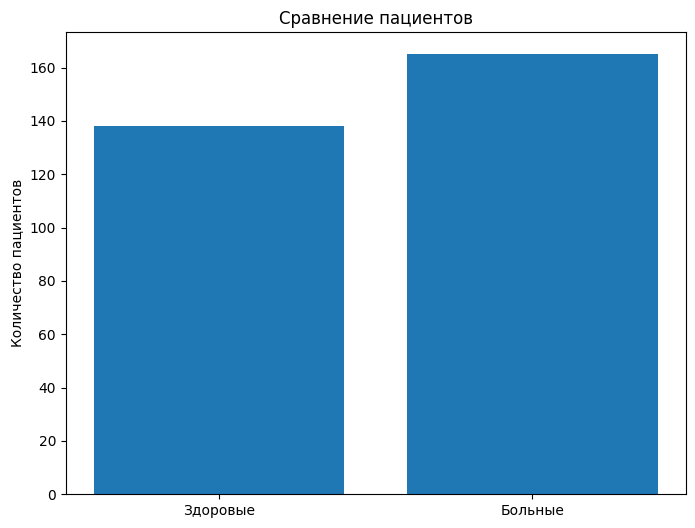

In [3]:
# Постройте столбчатую диаграмму, сравнивающую количество здоровых и больных пациентов
target_counts = df['target'].value_counts().sort_index()
plt.figure(figsize=(8, 6), facecolor='white') 
plt.bar(target_counts.index, target_counts.values)
plt.xticks([0, 1], ['Здоровые', 'Больные'])
plt.ylabel('Количество пациентов')
plt.title('Сравнение пациентов')
plt.show()


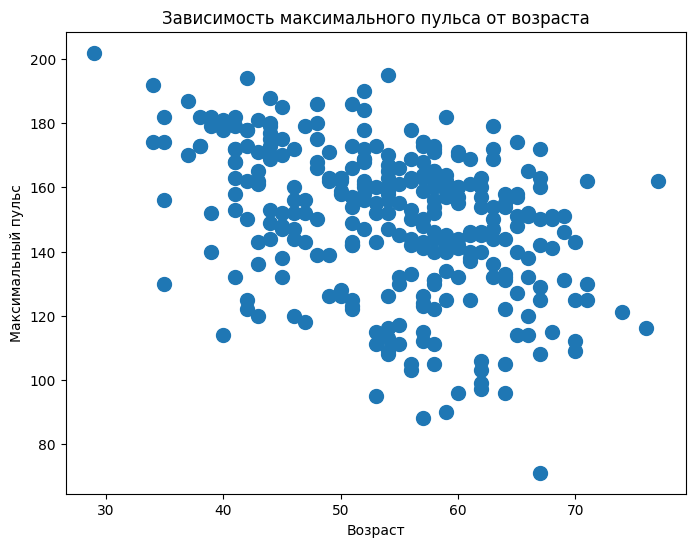

In [4]:
# Создайте диаграмму рассеяния, показывающую зависимость максимального пульса (thalach) от возраста (age)
plt.figure(figsize=(8, 6), facecolor='white') 
plt.scatter(df['age'], df['thalach'], s=100)
plt.xlabel('Возраст')
plt.ylabel('Максимальный пульс')
plt.title('Зависимость максимального пульса от возраста')
plt.show()


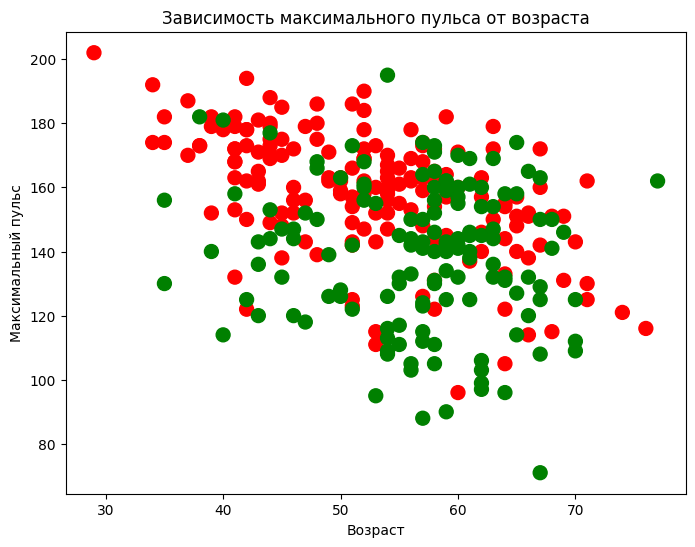

In [5]:
# Раскрасьте точки в зависимости от наличия болезни.
plt.figure(figsize=(8, 6), facecolor='white') 
colors = df['target'].map({0: 'green', 1: 'red'})
plt.scatter(df['age'], df['thalach'], c=colors, s=100)
plt.xlabel('Возраст')
plt.ylabel('Максимальный пульс')
plt.title('Зависимость максимального пульса от возраста')
plt.show()


In [6]:
#Преобразуйте признак sex (0 = женщина, 1 = мужчина) в более читаемый формат с категориями 'female' и 'male'
sex_mapping = {
    0:"female",
    1:"male"
} 
df['sex']=df['sex'].map(sex_mapping)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Затем примените к нему One-Hot Encoding
df_columns = df.columns.values
df = pd.get_dummies(df[df_columns], dtype="int")
df.head()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


In [8]:
# Рассчитайте средний уровень холестерина (chol) для больных и здоровых пациентов
mean_chol = df.groupby('target')['chol'].mean()
print(f"Среднее значение холестерина для здолвых пациентов: {mean_chol[0]:.2f}")
print(f"Среднее значение холестерина для больных: {mean_chol[1]:.2f}")


Среднее значение холестерина для здолвых пациентов: 251.09
Среднее значение холестерина для больных: 242.23


In [9]:
#Выполните нормализацию признаков age, trestbps, chol и thalach
features = ['age', 'trestbps', 'chol', 'thalach']
for column in features:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
0,0.950624,3,0.762694,-0.255910,1,0,0.015417,0,2.3,0,0,1,1,0,1
1,-1.912150,2,-0.092585,0.072080,0,1,1.630774,0,3.5,0,0,2,1,0,1
2,-1.471723,1,-0.092585,-0.815424,0,0,0.975900,0,1.4,2,0,2,1,1,0
3,0.179877,1,-0.662770,-0.198030,0,1,1.237849,0,0.8,2,0,2,1,0,1
4,0.289984,0,-0.662770,2.078611,0,1,0.582975,1,0.6,2,0,2,1,1,0
